<a href="https://colab.research.google.com/github/shivamsharma1234/Flaw-detection-in-steel-objects/blob/main/flaw_detection_shivam_sharma_9910902830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>The following scripts trains a Mask R-CNN model for prediction of flaws.</h1>

<h3>The scrpt loads the flaw detection code and then runs the train.py scripts from the notebook. The weights are saved in the logs file created in the drive. Using the tensorboard we select the best weights trained using Mask R-CNN and then test the results. The model developed is overfitted even after image augmentation</h3>

<h1>**Training Phase Preparation**</h1>

<h2>Step 1: Load drive</h2![alt text](https://)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>Step 2:Check GPU version</h2>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


<h2>Step 3:Unzip and load the contents of the mask rcnn code</h2>

In [ ]:
!unzip /content/drive/My\ Drive/flaw_detection_assignment/flaw_detection_shivam_sharma.zip

Archive:  /content/drive/My Drive/flaw_detection_assignment/flaw_detection_shivam_sharma.zip
   creating: flaw_detection_shivam_sharma/
   creating: flaw_detection_shivam_sharma/data/
   creating: flaw_detection_shivam_sharma/data/flaw_detection/
   creating: flaw_detection_shivam_sharma/data/flaw_detection/train/
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/via_region_data2.json  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/good_image.png  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/bad_image.png  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/via_region_data.json  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/via_region_data3.json  
   creating: flaw_detection_shivam_sharma/data/flaw_detection/val/
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/val/bad_image.png  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/val/good_image.png  
  inflat

In [ ]:
# !ls /content/drive/My\ Drive/flaw_detection_assignment

 flaw_detection2.zip		    logs
 flaw_detection_shivam_sharma	   'Untitled spreadsheet.gsheet'
 flaw_detection_shivam_sharma.zip


<h2>Step 4:Make virtual link the logs directory from drive to the training data folder unziped and theb list the files in the directories</h2>

In [ ]:
!ln -s /content/drive/My\ Drive/flaw_detection_assignment/logs /content/flaw_detection_shivam_sharma/

In [ ]:
%cd /content/flaw_detection_shivam_sharma/
%ls -ltr

/content/flaw_detection_shivam_sharma
total 16
-rwxrwxr-x 1 root root 2496 May 18 09:18 requirements.txt*
-rwxrwxr-x 1 root root  276 May 18 09:18 environment.yml*
drwxr-xr-x 3 root root 4096 Jun 20 07:13 data/
drwxrwxr-x 5 root root 4096 Jun 20 17:07 src/
lrwxrwxrwx 1 root root   54 Jun 21 10:20 logs -> '/content/drive/My Drive/flaw_detection_assignment/logs'/


<h2>Step 5:Update version of yaml library as we need to read yaml file variable and cofiguration details</h2>

In [ ]:
!pip3 install -U PyYAML

     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=93a0ae99196833fb72b4662476cc533ea556e8ed6f82e199c6b9455aa22cbc19
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


<h2>Step 6:Install Tensorboard 1.15.0 and Keras=2.2.5 for mask rcnn training.</h2>

In [ ]:
!python3 -c 'import tensorflow as tf; print(tf.__version__)'

2020-09-21 07:29:47.320122: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2.3.0


In [ ]:
!pip3 install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 20kB/s 
     |████████████████████████████████| 3.8MB 29.4MB/s 
     |████████████████████████████████| 512kB 39.2MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=c85b3b6392c2e3d9d43ceee6f0693d3492e4df3b2c3fb1980a4fbf6c045c37af
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
!pip3 install keras==2.2.5

     |████████████████████████████████| 337kB 2.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
TRAIN_FILE="/content/flaw_detection/src/GeneralSet/train/train.py"
DATASET="/content/flaw_detection/data/flaw_detection"
WEIGHTS="coco"
LOGDIR="/content/flaw_detection/logs"
TRAIN_FOR="types"
CONFIG_YML="/content/flaw_detection/src/speciality.yaml"
SPECIALITY="Flaws"
 

<h2>Step 7:Run the below command to run the train.py file for training.</h2>

<h3>The training process loads the training and validation data with their .json annotations for training. 'COCO' weights are used to initialse and then the output layers is removed and trained according to our need. Weights are saved into the logs file after each 5 epochs. Augmentation has been applied to reduce overfitting and generate some data for training.</h3>

In [ ]:
!python3 /content/flaw_detection_shivam_sharma/src/GeneralSet/train/train.py "types" --dataset /content/flaw_detection_shivam_sharma/data/flaw_detection --config_yml /content/flaw_detection_shivam_sharma/src/speciality.yaml --speciality "Flaws" --weights "coco" --logs /content/flaw_detection_shivam_sharma/logs   

Appended, /src/Mask_RCNN to PATH
/content/flaw_detection_shivam_sharma/src/GeneralSet/train/../../
Using TensorFlow backend.
Set Type:  types
Weights:  coco
Dataset:  /content/flaw_detection_shivam_sharma/data/flaw_detection
Logs:  /content/flaw_detection_shivam_sharma/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  480
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEAR

<h1>**Testing Phase**</h1>


<h2>Step 1: Using tensorboard check the loss for weights trained. Select the weights with the minimum weights</h2>

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime, os

In [ ]:
%tensorboard --logdir=/content/drive/My\ Drive/flaw_detection_assignment/logs

<IPython.core.display.Javascript object>

<h2>Step 2:Loading the code again</h2>

In [ ]:
!unzip "/content/drive/My Drive/flaw_detection_assignment/flaw_detection_shivam_sharma.zip"

Archive:  /content/drive/My Drive/flaw_detection_assignment/flaw_detection.zip
   creating: flaw_detection_shivam_sharma/
   creating: flaw_detection_shivam_sharma/data/
   creating: flaw_detection_shivam_sharma/data/flaw_detection/
   creating: flaw_detection_shivam_sharma/data/flaw_detection/train/
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/via_region_data2.json  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/good_image.png  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/bad_image.png  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/via_region_data.json  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/train/via_region_data3.json  
   creating: flaw_detection_shivam_sharma/data/flaw_detection/val/
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/val/bad_image.png  
  inflating: flaw_detection_shivam_sharma/data/flaw_detection/val/good_image.png  
  inflating: flaw_dete

<h2>Step 3:Listing the weights the trained and saved in the log file</h2>

In [ ]:
%cd /content/flaw_detection_shivam_sharma/src
%ls -ltr

/content/flaw_detection_shivam_sharma/src
total 36
-rw-rw-r-- 1 root root    0 May 18 09:18 __init__.py
-rwxrwxr-x 1 root root 2846 May 18 09:18 build_dataset.py*
-rw-rw-r-- 1 root root  151 May 18 09:18 results.txt
drwxrwxr-x 4 root root 4096 Jun 20 07:19 Mask_RCNN/
-rwxrwxr-x 1 root root 4576 Jun 20 08:43 datasets.py*
-rw-rw-r-- 1 root root  332 Jun 20 16:51 speciality.yaml
-rwxrwxr-x 1 root root 2636 Jun 20 17:07 config.py*
drwxr-xr-x 2 root root 4096 Jun 21 07:54 __pycache__/
drwxrwxr-x 3 root root 4096 Jun 21 10:04 GeneralSet/


<h2>Step 4:Loading Libraries necessary for testing</h2>

In [ ]:
import os 
import sys
import warnings
warnings.filterwarnings('ignore')
import time
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import string
import config as config_file

# sys.path.append()
from Mask_RCNN.mrcnn import utils
import Mask_RCNN.mrcnn.model as modellib
from Mask_RCNN.mrcnn import visualize
#import class_names

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import colorsys

from time import strftime
from glob import glob
import tensorflow as tf
from keras import backend as K
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import yaml


<h2>Step 5:Defining Root directory for importing files</h2>

In [ ]:
ROOT_DIR = os.path.abspath(os.getcwd())
print(ROOT_DIR)

/content/flaw_detection_shivam_sharma/src


<h2>Step 6:Files paths for yaml file, best model path and test image files<h2>

In [ ]:
config_yml = os.path.join(ROOT_DIR,"speciality.yaml")
model_path = os.path.join(ROOT_DIR,"../logs/flawing20200620T1721/mask_rcnn_flawing_0080.h5")
test_files = os.path.join(ROOT_DIR,"../data/flaw_detection/val")
image_type = "colored"
verbose="True"

<h2>Step 7:Reading yaml file for details about classes and configurations</h2>

In [ ]:

with open(config_yml) as f:
    set_config = yaml.load(f, Loader=yaml.FullLoader)['Flaws']
class_name = set_config['types']


<h2>Step 8:We have 2 classes of Flaws good and bad</h2>

In [ ]:
print("Flaws Types:",class_name)

Flaws Types: ['BG', 'good', 'bad']


<h2>Step 9:Inference function</h2>

<h3>The below function takes model and image file and returns the detected results. The results consists of the mask, ROI, score and predicted id of the flaw</h3>

In [ ]:
def run_inference(model,image):
    
    #print(image.shape)
    results = model.detect([image])
    r = results[0]
    return r

<h2>Step 10:The below code loads the trained .h5 weights file and returns a mask rcnn model for prediction</h2>

In [ ]:
def load_model(model_path,class_name,config):
    class InferenceConfig(config.__class__):
        GPU_COUNT = 1
        IMAGES_PER_GPU = 1
        

    config = InferenceConfig()

    # Create model object in inference mode.
    model = modellib.MaskRCNN(mode="inference", model_dir=model_path, config=config)

    model.load_weights(model_path, by_name=True)

    hsv = [(i / len(class_name), 1, 1.0) for i in range(len(class_name))]
    COLORS = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.seed(42)
    random.shuffle(COLORS)
    model.keras_model._make_predict_function()

    return model

<h2>Step 11:Load the configuration details</h2>

In [ ]:
config = config_file.FlawSetConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  480
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE            

<h2>Step 12:Load the model weights</h2>

In [ ]:
model = load_model(model_path,class_name,config)

Loading weights from /content/flaw_detection_shivam_sharma/src/../logs/flawing20200620T1721/mask_rcnn_flawing_0080.h5
Re-starting from epoch 80


<h2>Step 13:Read the files for testing</h2>

In [ ]:
files = glob(os.path.join(test_files,"*.png"))

<h2>Step 14:Display and Predict the results for each image</h2>

  0%|          | 0/2 [00:00<?, ?it/s]

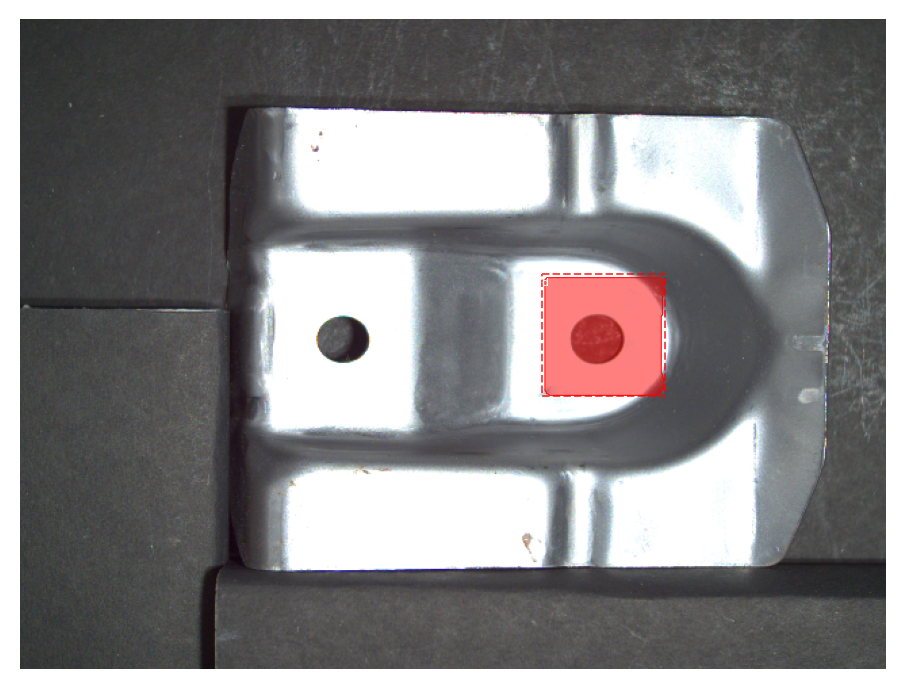

 50%|█████     | 1/2 [00:08<00:08,  8.18s/it]

Actual: bad |Predicted: bad


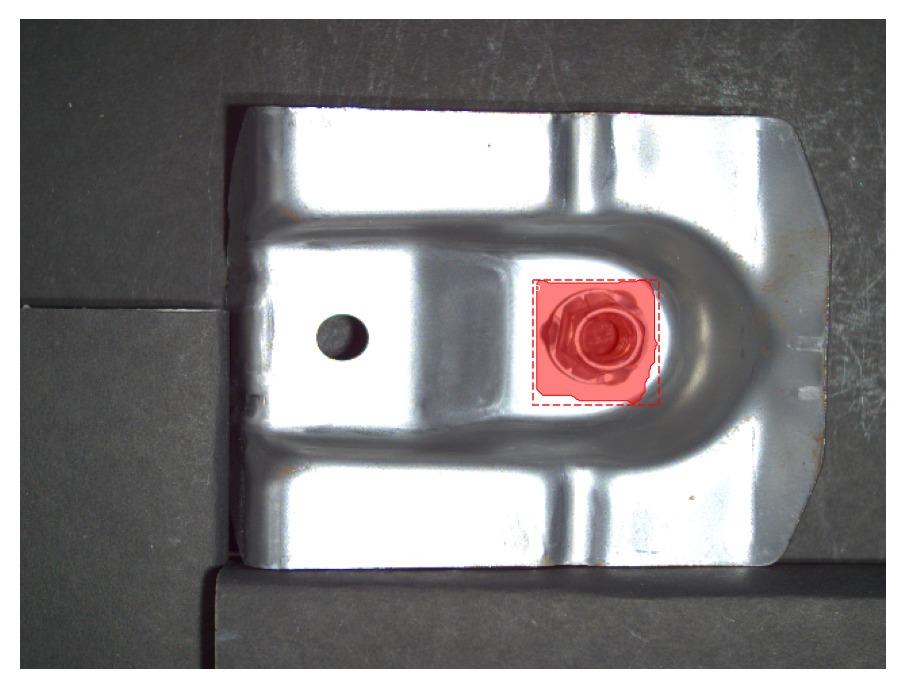

100%|██████████| 2/2 [00:15<00:00,  7.71s/it]

Actual: good |Predicted: good


In [ ]:
preds = []
gts = []
gt_file = []
f=0
for file in tqdm(files):
    image = skimage.io.imread(file)
    if image_type == 'Binary':
        image = np.expand_dims(image, axis=2)

    res = run_inference(model,image)
    results= res['class_ids']
    visualize.display_instances(image, res['rois'], res['masks'], res['class_ids'],class_name[res['class_ids'][0]])
    if(len(results)==0):
        pred = "No Detection"
    else:
        pred = class_name[results[0]]
        #print(len(results),os.path.basename(file),pred)


    gt = os.path.basename(file)[:-4].rstrip(string.digits).rstrip('_image')


    #print(pred,os.path.basename(file))
    if verbose=="True":
        print("Actual:",gt,"|Predicted:",pred)
    
    preds.append(pred)
    gts.append(gt)
    

<h2>Step 15:Plot the confusion matrix for the classes predicted</h2>

In [ ]:
sns.set()
try:
    class_name.remove('BG') # select all values expcept 'BG'
except:
    pass
class_name.append("No Detection")
print("Class Names:",class_name)


Class Names: ['good', 'bad', 'No Detection']


Confusion Matrix
              good  bad  No Detection
good             1    0             0
bad              0    1             0
No Detection     0    0             0


Test Accuracy: 1.0


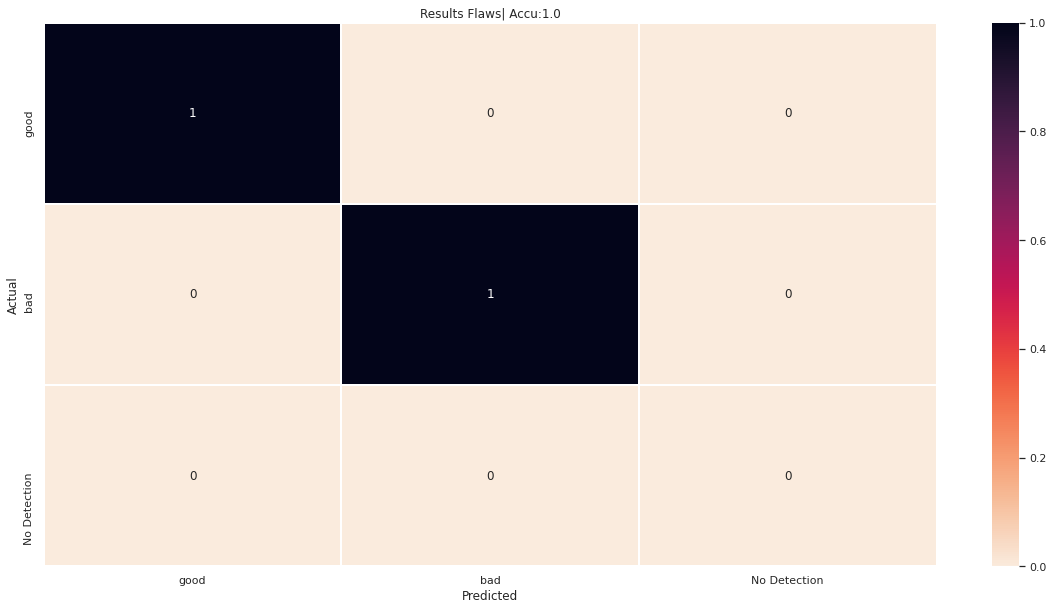

In [ ]:
array = confusion_matrix(gts, preds, labels=class_name)
#print(gts)
#print(preds)
df_cm = pd.DataFrame(array, index = class_name, columns = class_name)
print("Confusion Matrix")
print(df_cm)
plt.figure(figsize = (20,10))

sns_plot = sns.heatmap(df_cm, annot=True, cmap =sns.cm.rocket_r,linecolor='white', linewidths=1)
accuracy = round(accuracy_score(gts, preds), 2)
print("\n\nTest Accuracy:",accuracy)


sns_plot.set(title='Results Flaws'+ "| Accu:"+ str(accuracy),
  xlabel="Predicted",
  ylabel="Actual")
plt.show()